# **Wine Tasting**

## *Applying the Explainable Artifical Intelligence approach to wine quality assessment*

## **The dataset**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: 
- [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
- [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
- [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

## **Introduction**

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).
 
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods. 

Number of Instances: red wine - 1599; white wine - 4898. 

Number of Attributes: 11 + output attribute
  
Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data): 
12. quality (score between 0 and 10)

## **Data**

We are going to focus on white wine, purely because of the number of instances.

In [112]:
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [113]:
wine = pd.read_csv('winequality-white.csv', sep=';')

In [114]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [115]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [116]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Saving figure attribute_histogram_plots


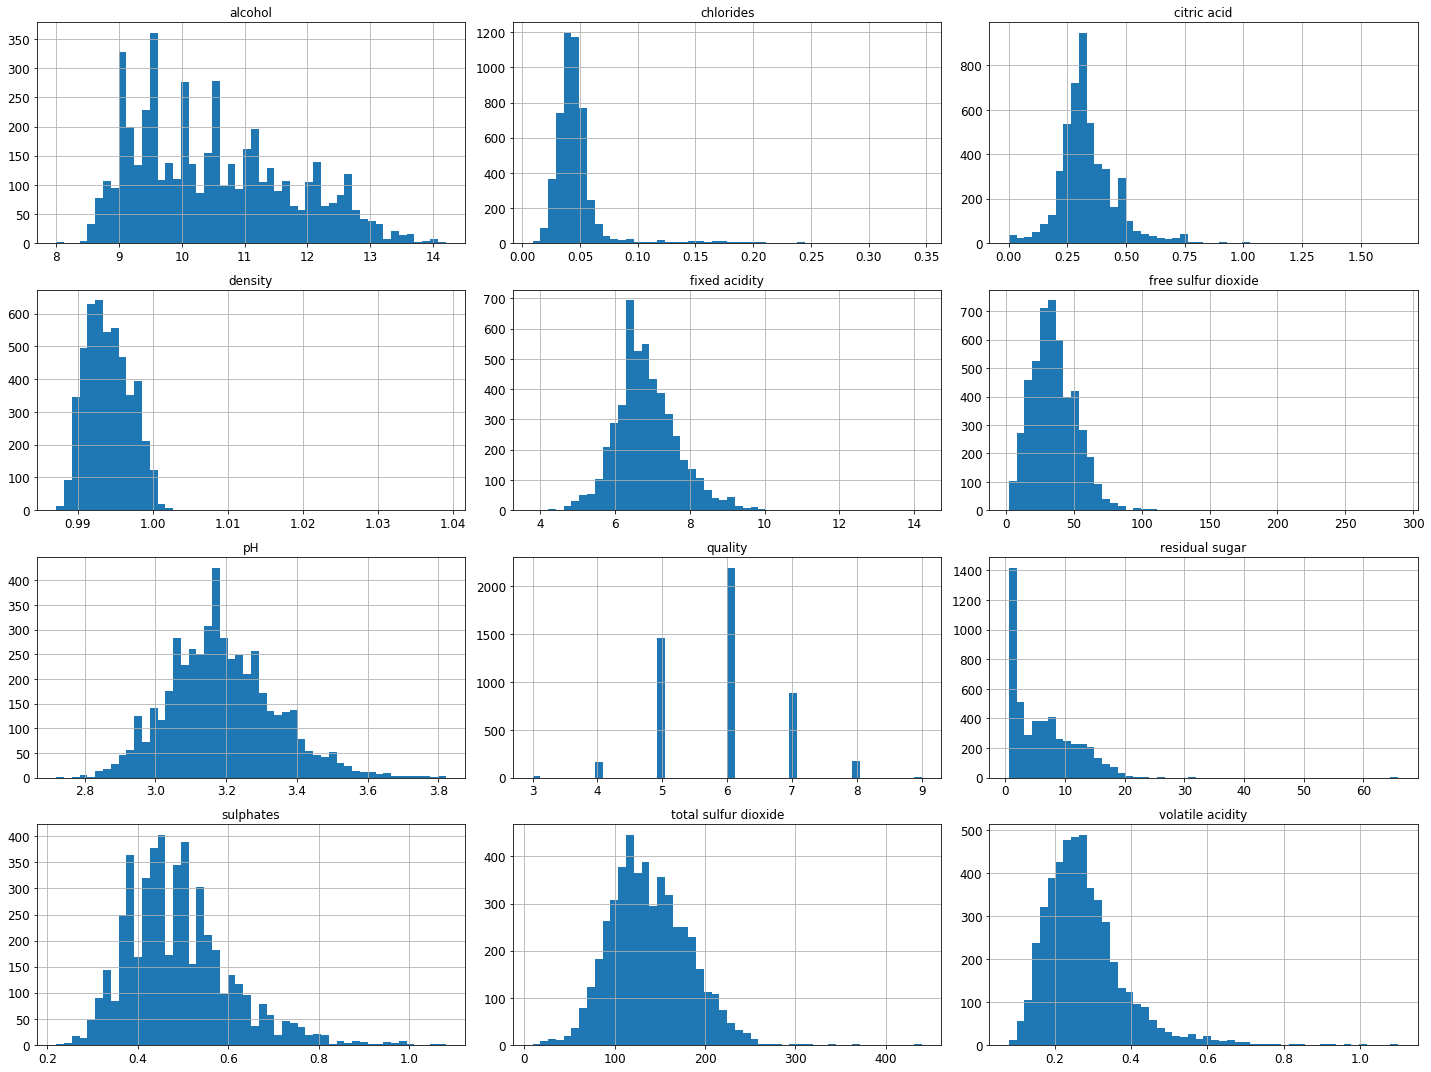

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## **Models**

### Simple Linear Regression

In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

80/20 split

In [119]:
train_dataset = wine.sample(frac=0.8, random_state=0)
test_dataset = wine.drop(train_dataset.index)

Get the stats

In [120]:
train_stats = train_dataset.describe()
train_stats.pop('quality')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3918.0,6.858754,0.855479,4.20000,6.300000,6.80000,7.3000,14.20000
volatile acidity,3918.0,0.278278,0.100173,0.08000,0.210000,0.26000,0.3200,1.00500
citric acid,3918.0,0.334722,0.122170,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,3918.0,6.380028,5.057262,0.60000,1.700000,5.20000,9.8500,65.80000
chlorides,3918.0,0.045709,0.022408,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,3918.0,35.172282,17.139453,2.00000,23.000000,34.00000,45.0000,289.00000
total sulfur dioxide,3918.0,137.688999,42.577736,9.00000,107.000000,133.50000,166.0000,440.00000
density,3918.0,0.994021,0.002987,0.98711,0.991753,0.99373,0.9961,1.03898
pH,3918.0,3.187412,0.151155,2.72000,3.080000,3.18000,3.2800,3.82000
sulphates,3918.0,0.489104,0.114159,0.23000,0.410000,0.47500,0.5500,1.08000


Drop the label

In [121]:
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

Normalize data

In [122]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Build the model

In [123]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse', 
                  optimizer=optimizer, 
                  metrics=['mae', 'mse'])
    return model

In [124]:
model = build_model()

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


Train the data

In [126]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
        
EPOCHS = 100

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks=[early_stop, PrintDot()])


.........................................

In [127]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
36,0.410798,0.501392,0.410798,0.569145,0.576835,0.569145,36
37,0.406050,0.498589,0.406050,0.608904,0.610929,0.608904,37
38,0.401883,0.496922,0.401883,0.599007,0.591740,0.599007,38
39,0.410141,0.502530,0.410141,0.574490,0.578455,0.574490,39
40,0.398568,0.496293,0.398568,0.581079,0.580404,0.581079,40


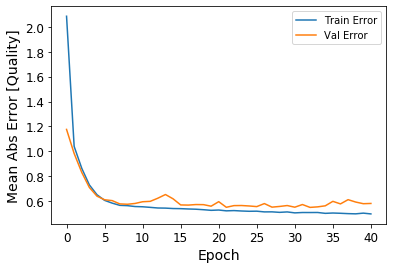

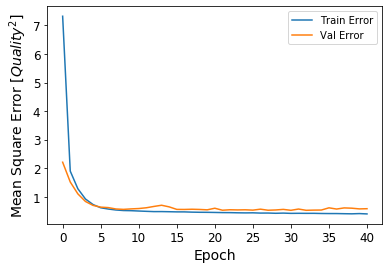

In [128]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Quality]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()
    
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Quality^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
    
plot_history(history)

In [132]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)\

print('Testing set Mean Abs Error: {:5.2f} Quality points'.format(mae))

Testing set Mean Abs Error:  0.56 Quality points


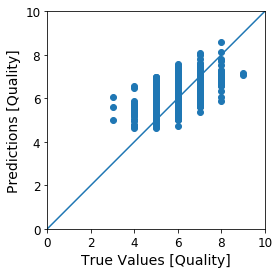

In [133]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Quality]')
plt.ylabel('Predictions [Quality]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, 10])
plt.ylim([0, 10])
_ = plt.plot([0, 10], [0, 10])

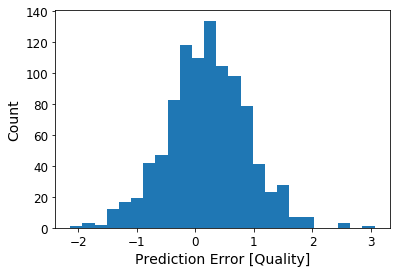

In [131]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [Quality]')
_ = plt.ylabel('Count')